# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [220]:
m = 1
A = 0.049#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [221]:
res=m;
N=2.0^m*500.0/2.0
Xf=1.0;

dx=Xf/N;
dt=0.1*round(dx,digits=10);
Nt=2.0^m*500.0/2.0
Tf=Nt*dt; #final time
print(Tf)

0.1

In [222]:
print(N)

500.0

In [223]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.002
dt =0.0002
dx/dt =10.0


In [224]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [225]:
include("./ScalarField.jl");

In [226]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);

initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.002
the time step is 0.0002


In [227]:
"""if m==1
    initX1=chebyshev(int((L-6)))
    L1=L;
elseif m==2
    initX1=doublegrid(chebyshev(int((L1-6))))
else
    initX1=doublegrid(doublegrid(chebyshev(int((L1-6)))))
end
initX=collect(initX)
initX[4:L-3]=initX1;"""

"if m==1\n    initX1=chebyshev(int((L-6)))\n    L1=L;\nelseif m==2\n    initX1=doublegrid(chebyshev(int((L1-6))))\nelse\n    initX1=doublegrid(doublegrid(chebyshev(int((L1-6)))))\nend\ninitX=collect(initX)\ninitX[4:L-3]=initX1;"

# Initial data of m β Ψ and Ψ,x

In [228]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [229]:
"""integ=integrator(initX,derpsi_func)
plot(initX1, integ[4:L-3],xlim=[0,0.001])"""

"integ=integrator(initX,derpsi_func)\nplot(initX1, integ[4:L-3],xlim=[0,0.001])"

In [230]:
y0=[0 0 0]
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array = ghost(state_array);

#state_array[4:L-3,3] = rk4wrapper(psiRHS,0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array[4:L-3,3] = integrator(initX,derpsi_func)[4:L-3]

psi_func = Spline1D(initX[4:L-3],state_array[4:L-3,3],k=4)
funcs = [psi_func derpsi_func]
        
y0=[0.0 0.0]
#state_array[4:L-3,1:2] = n_rk4wrapper(mbetaRHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

1×2 Matrix{Float64}:
 0.0  0.0

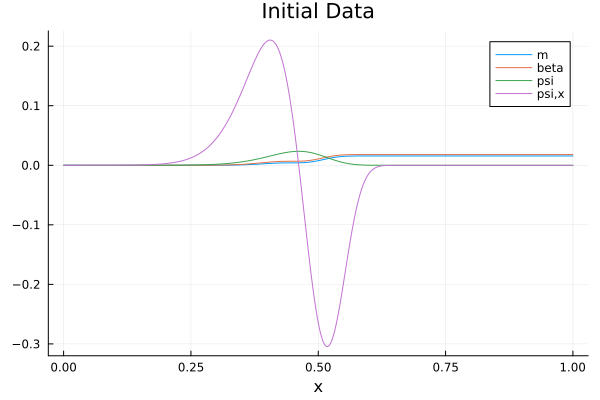

In [231]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [232]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

In [233]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [234]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

10.0


 ## Time evolution

fixed grid

In [235]:
finaltime=1.3#4#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 10 dt is 0.0002, time of iteration is 0.0020000000000000005
iteration 20 dt is 0.0002, time of iteration is 0.004000000000000001
iteration 30 dt is 0.0002, time of iteration is 0.0059999999999999975
iteration 40 dt is 0.0002, time of iteration is 0.007999999999999995
iteration 50 dt is 0.0002, time of iteration is 0.01
iteration 60 dt is 0.0002, time of iteration is 0.012000000000000005
iteration 70 dt is 0.0002, time of iteration is 0.01400000000000001
iteration 80 dt is 0.0002, time of iteration is 0.016000000000000014
iteration 90 dt is 0.0002, time of iteration is 0.018000000000000002
iteration 100 dt is 0.0002, time of iteration is 0.01999999999999999
iteration 110 dt is 0.0002, time of iteration is 0.021999999999999978
iteration 120 dt is 0.0002, time of iteration is 0.023999999999999966
iteration 130 dt is 0.0002, time of iteration is 0.025999999999999954
iteration 140 dt is 0.0002, time of iteration is 0.02799999999999994
iteration 150 dt is 0.0002, time of iteration 

iteration 1200 dt is 0.0002, time of iteration is 0.24000000000000482
iteration 1210 dt is 0.0002, time of iteration is 0.24200000000000488
iteration 1220 dt is 0.0002, time of iteration is 0.24400000000000494
iteration 1230 dt is 0.0002, time of iteration is 0.246000000000005
iteration 1240 dt is 0.0002, time of iteration is 0.24800000000000505
iteration 1250 dt is 0.0002, time of iteration is 0.2500000000000051
iteration 1260 dt is 0.0002, time of iteration is 0.2520000000000049
iteration 1270 dt is 0.0002, time of iteration is 0.25400000000000467
iteration 1280 dt is 0.0002, time of iteration is 0.25600000000000445
iteration 1290 dt is 0.0002, time of iteration is 0.2580000000000042
iteration 1300 dt is 0.0002, time of iteration is 0.260000000000004
iteration 1310 dt is 0.0002, time of iteration is 0.2620000000000038
iteration 1320 dt is 0.0002, time of iteration is 0.26400000000000357
iteration 1330 dt is 0.0002, time of iteration is 0.26600000000000334
iteration 1340 dt is 0.0002,

iteration 2380 dt is 0.0002, time of iteration is 0.4759999999999802
iteration 2390 dt is 0.0002, time of iteration is 0.47799999999998
iteration 2400 dt is 0.0002, time of iteration is 0.4799999999999798
iteration 2410 dt is 0.0002, time of iteration is 0.48199999999997956
iteration 2420 dt is 0.0002, time of iteration is 0.48399999999997934
iteration 2430 dt is 0.0002, time of iteration is 0.4859999999999791
iteration 2440 dt is 0.0002, time of iteration is 0.4879999999999789
iteration 2450 dt is 0.0002, time of iteration is 0.4899999999999787
iteration 2460 dt is 0.0002, time of iteration is 0.49199999999997845
iteration 2470 dt is 0.0002, time of iteration is 0.49399999999997823
iteration 2480 dt is 0.0002, time of iteration is 0.495999999999978
iteration 2490 dt is 0.0002, time of iteration is 0.4979999999999778
iteration 2500 dt is 0.0002, time of iteration is 0.4999999999999776
iteration 2510 dt is 0.0002, time of iteration is 0.5019999999999774
iteration 2520 dt is 0.0002, time

iteration 3570 dt is 0.0002, time of iteration is 0.713999999999954
iteration 3580 dt is 0.0002, time of iteration is 0.7159999999999538
iteration 3590 dt is 0.0002, time of iteration is 0.7179999999999536
iteration 3600 dt is 0.0002, time of iteration is 0.7199999999999533
iteration 3610 dt is 0.0002, time of iteration is 0.7219999999999531
iteration 3620 dt is 0.0002, time of iteration is 0.7239999999999529
iteration 3630 dt is 0.0002, time of iteration is 0.7259999999999527
iteration 3640 dt is 0.0002, time of iteration is 0.7279999999999525
iteration 3650 dt is 0.0002, time of iteration is 0.7299999999999522
iteration 3660 dt is 0.0002, time of iteration is 0.731999999999952
iteration 3670 dt is 0.0002, time of iteration is 0.7339999999999518
iteration 3680 dt is 0.0002, time of iteration is 0.7359999999999516
iteration 3690 dt is 0.0002, time of iteration is 0.7379999999999514
iteration 3700 dt is 0.0002, time of iteration is 0.7399999999999511
iteration 3710 dt is 0.0002, time of

iteration 4760 dt is 0.0002, time of iteration is 0.9519999999999278
iteration 4770 dt is 0.0002, time of iteration is 0.9539999999999276
iteration 4780 dt is 0.0002, time of iteration is 0.9559999999999274
iteration 4790 dt is 0.0002, time of iteration is 0.9579999999999271
iteration 4800 dt is 0.0002, time of iteration is 0.9599999999999269
iteration 4810 dt is 0.0002, time of iteration is 0.9619999999999267
iteration 4820 dt is 0.0002, time of iteration is 0.9639999999999265
iteration 4830 dt is 0.0002, time of iteration is 0.9659999999999263
iteration 4840 dt is 0.0002, time of iteration is 0.967999999999926
iteration 4850 dt is 0.0002, time of iteration is 0.9699999999999258
iteration 4860 dt is 0.0002, time of iteration is 0.9719999999999256
iteration 4870 dt is 0.0002, time of iteration is 0.9739999999999254
iteration 4880 dt is 0.0002, time of iteration is 0.9759999999999251
iteration 4890 dt is 0.0002, time of iteration is 0.9779999999999249
iteration 4900 dt is 0.0002, time o

iteration 5960 dt is 0.0002, time of iteration is 1.1919999999999014
iteration 5970 dt is 0.0002, time of iteration is 1.1939999999999011
iteration 5980 dt is 0.0002, time of iteration is 1.195999999999901
iteration 5990 dt is 0.0002, time of iteration is 1.1979999999999007
iteration 6000 dt is 0.0002, time of iteration is 1.1999999999999005
iteration 6010 dt is 0.0002, time of iteration is 1.2019999999999003
iteration 6020 dt is 0.0002, time of iteration is 1.2039999999999
iteration 6030 dt is 0.0002, time of iteration is 1.2059999999998998
iteration 6040 dt is 0.0002, time of iteration is 1.2079999999998996
iteration 6050 dt is 0.0002, time of iteration is 1.2099999999998994
iteration 6060 dt is 0.0002, time of iteration is 1.2119999999998992
iteration 6070 dt is 0.0002, time of iteration is 1.213999999999899
iteration 6080 dt is 0.0002, time of iteration is 1.2159999999998987
iteration 6090 dt is 0.0002, time of iteration is 1.2179999999998985
iteration 6100 dt is 0.0002, time of it

In [236]:
println(dt)
println(dx)
println(epsilon(dt,dx))
println(epsilon(dt/2,dx))

#se monitor ratio > x, then dt->dt/, epsilon->epsilon*2

0.0002
0.002
0.078125
0.15625


In [237]:
println(dt)
println(dx)
println(epsilon(dt/2,dx))

0.0002
0.002
0.15625


 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
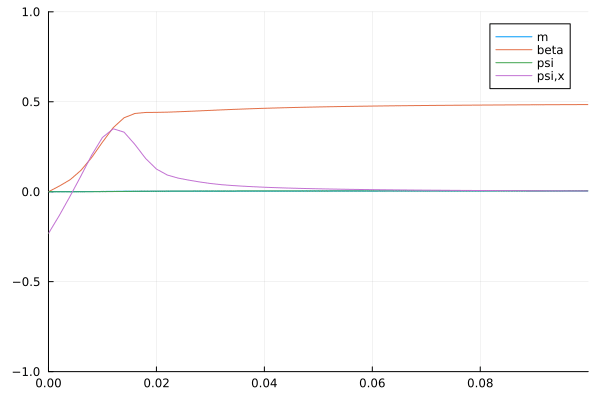

In [239]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 5000:1:6500
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1, 1],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 600)

In [312]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio10.csv" is not a valid file or doesn't exist

In [107]:
epsilon(dt,dx)

0.009765625

In [37]:

auxinitX= range(0,1,step=dx)
println(Der(state_array,6,4,auxinitX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, auxinitX[6]))

3.017168193837207e-8
0.00017208804225226937


In [53]:
println(Der(state_array,60,4,initX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, initX[60]))

println(derivative(spl, initX[60]).-Der(state_array,60,4,initX))

0.014407887381376435
0.014407810796996974
-7.658437946138352e-8


In [30]:
using Roots
find_zero(derpsi_func, (0,0.5), Bisection())

0.2713799770174635

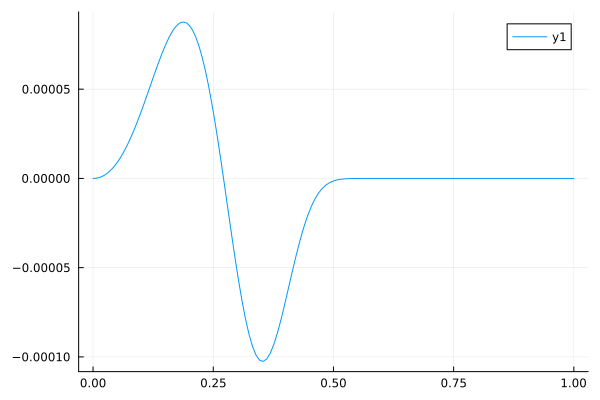

In [23]:
using Plots
plot(initX1, derpsi_func(initX1))

In [66]:
m_func = Spline1D(initX[4:L-3],state_array[4:L-3,1],k=4)
beta_func = Spline1D(initX[4:L-3],state_array[4:L-3,2],k=4)
der_funcs=[derivative(m_func,initX) derivative(beta_func,initX) derivative(derpsi_func,initX)]
der_funcs[2,1] # i is gridpoint, j is function

-1.5086563198078306e-16

In [58]:
derivative(m_func,initX)

207-element Vector{Float64}:
 -3.6298572062043756e-16
 -1.5086563198078306e-16
 -4.2846357130174216e-17
 -3.826449677788914e-18
  1.2955367671949918e-18
  7.621048595599677e-18
  5.1885306005563256e-17
  2.109734086495333e-16
  6.633715930192716e-16
  1.768094158067992e-15
  4.2032891114686175e-15
  9.186535719427543e-15
  1.882331476354324e-14
  ⋮
 -3.776355223175436e-19
 -1.7646519734465227e-20
  1.0587911840678348e-20
  2.2651714422785337e-19
 -1.4750589189488752e-19
 -3.7472920178666525e-19
  6.78866591885402e-20
 -2.96640705754548e-20
  5.421010862427541e-19
  3.1064380724396854e-18
  8.986602830812212e-18
  1.9505851304156383e-17

In [166]:
derivative(derpsi_func,initX1[1])

3.9599527939805415e-10

In [163]:
derivative(derpsi_func,initX1)[1]

3.9599527939805415e-10

In [161]:
derivative(derpsi_func,initX)[4]

3.9599527939805415e-10

In [ ]:
aux=doublegrid(initX1)

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, ylim=[0, 10^(-13)])

##

x2=aux
y2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A);

##

double_resolution=y2
basis_resolution=y1
xs = ( x1, x2 )
ys = ( basis_resolution, double_resolution*16*4 )
p = plot()
map(x->plot!(x[1],x[2],xaxis="x",title="Interpolation error", legend=false), zip(xs, ys))
display(p)
     